In [1]:
import numpy as np
import cv2
#Import necessary functions
from matplotlib import pyplot as plt
import skimage.io
import skimage.color
from planarH import computeH_ransac, compositeH, computeH_norm
from my_functions import  compositeH_panorama, compositeH_panorama_blend, find_location_relationship, panorama_stitching, find_destination_img
from itertools import permutations

#Write script for Q14
img_dict = {}
img_dict['img1'] = cv2.imread('../data/image1.png')
img_dict['img2'] = cv2.imread('../data/image2.png')
img_dict['img3'] = cv2.imread('../data/image3.png')
img_dict['img4'] = cv2.imread('../data/image4.png')

ImportError: cannot import name 'image_stitching' from 'my_functions' (/home/joonsu0109/git/3d_vision/3DVision_PA1/python/my_functions.py)

In [2]:
def get_avg_matched_points_distance(img1, img2):
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    orb = cv2.ORB_create(nfeatures=10000)

    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    matches_cv = bf.match(des1, des2)

    # Sort matches by distance
    matches_cv = sorted(matches_cv, key=lambda x: x.distance)

    # Select the top 10% accurate matches

    num_matches = int(len(matches_cv) * 0.1)  # choose 10% of total matches
    best_matches = matches_cv[:num_matches]


    pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
    pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

    avg=[]
    for i in range(len(best_matches)):
        x1, y1 = pts1_best[i]
        x2, y2 = pts2_best[i][0]+img1.shape[1], pts2_best[i][1]
        distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
        avg = np.append((distance),avg)
    distance_avg= np.mean(avg)

    return distance_avg

In [4]:
def find_destination_img(img_dict):
    
    img_loc_dict = {}

    loc_nto1 = {}
    loc_nto1["img2"] = find_location_relationship(img_dict["img2"], img_dict["img1"])
    loc_nto1["img3"] = find_location_relationship(img_dict["img3"], img_dict["img1"])
    loc_nto1["img4"] = find_location_relationship(img_dict["img4"], img_dict["img1"])
    img_loc_dict["img1"] = loc_nto1
    print("loc_nto1", loc_nto1)

    loc_nto2 = {}
    loc_nto2["img1"] = find_location_relationship(img_dict["img1"], img_dict["img2"])
    loc_nto2["img3"] = find_location_relationship(img_dict["img3"], img_dict["img2"])
    loc_nto2["img4"] = find_location_relationship(img_dict["img4"], img_dict["img2"])
    img_loc_dict["img2"] = loc_nto2
    print("loc_nto2", loc_nto2)

    loc_nto3 = {}
    loc_nto3["img1"] = find_location_relationship(img_dict["img1"], img_dict["img3"])
    loc_nto3["img2"] = find_location_relationship(img_dict["img2"], img_dict["img3"])
    loc_nto3["img4"] = find_location_relationship(img_dict["img4"], img_dict["img3"])
    img_loc_dict["img3"] = loc_nto3
    print("loc_nto3", loc_nto3)

    loc_nto4 = {}
    loc_nto4["img1"] = find_location_relationship(img_dict["img1"], img_dict["img4"])
    loc_nto4["img2"] = find_location_relationship(img_dict["img2"], img_dict["img4"])
    loc_nto4["img3"] = find_location_relationship(img_dict["img3"], img_dict["img4"])
    img_loc_dict["img4"] = loc_nto4
    print("loc_nto4", loc_nto4)

    return img_loc_dict

In [2]:
imgs_dict = find_destination_img(img_dict)

NameError: name 'find_destination_img' is not defined

In [6]:
def find_key_with_largest_value(d):


In [12]:
dict_for_counting = {}

for i in imgs_dict.keys():
    dict_for_counting[i] = len(set(imgs_dict[i].values()))

max_value = max(dict_for_counting.values())
for key, value in dict_for_counting.items():
    if value == max_value:
        center_img = key

#center_img = find_key_with_largest_value(dict_for_counting)
print("Center img is", center_img)
for i, j in imgs_dict[center_img].items():
    print(i, "is on", j)

Center img is img2
img1 is on top
img3 is on left
img4 is on bottom


In [13]:
def image_stitching(img_src, img_dst):
    

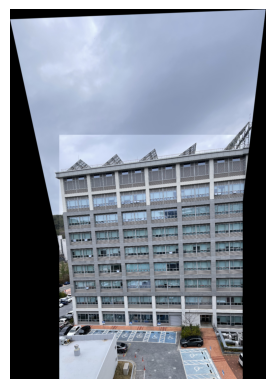

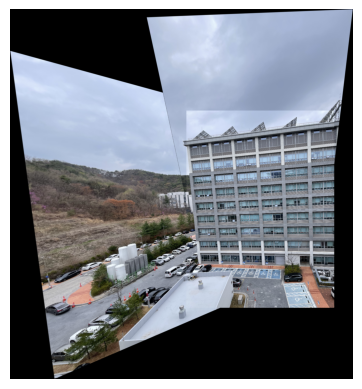

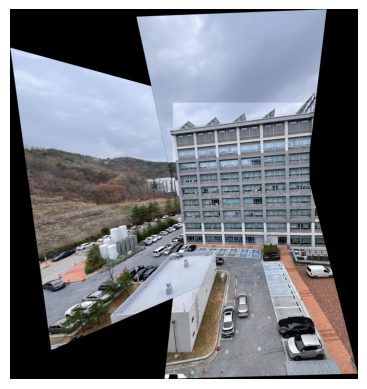

In [14]:
count = 2
for i in imgs_dict[center_img].keys():
    if count == 2:
        panorama = img_dict.get(center_img)
    panorama = panorama_stitching(img_dict.get(i), panorama)
    cv2.imwrite(f'../result/panorama_{count}.png', panorama)
    count += 1
